In [3]:
import numpy as np
import sympy as sy
#import control.matlab as cm
sy.init_printing()

# First order hold sampling of a lead compensator
\begin{equation}
F(s) = K\frac{s+b}{s+a}
\end{equation}



In [4]:
h, b, a,K = sy.symbols('h, b, a, K', real=True, positive=True)
s, z = sy.symbols('s, z', real=False)

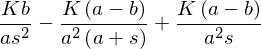

In [5]:
F = K*(s+b)/(s+a)
U = F/s/s
Up = sy.apart(U, s)
Up

In [6]:
from sympy.integrals.transforms import inverse_laplace_transform
from sympy.abc import t

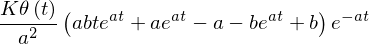

In [7]:
u = sy.simplify(inverse_laplace_transform(Up, s, t))
u

## Sampling and taking the z-transform of the step-response
\begin{equation}
Y(z) = \frac{1}{\lambda} \left( \frac{z}{z-\mathrm{e}^{\lambda h}} - \frac{z}{z-1} \right).
\end{equation}

## Dividing by the z-transform of the input signal 
\begin{equation}
H(z) = \frac{z-1}{z}Y(z) = \frac{1}{\lambda} \left( \frac{ \mathrm{e}^{\lambda h} - 1 }{ z - \mathrm{e}^{\lambda h} } \right)
\end{equation}


## Verifying for specific value of lambda

In [9]:
import control.matlab as cm
lam = -0.5
h = 0.1
G = cm.tf([1], [1, -lam])
Gd = cm.c2d(G, h)
Hd = 1/lam * cm.tf([np.exp(lam*h)-1],[1, np.exp(lam*h)])

In [10]:
print(Gd)
print(Hd)


  0.09754
----------
z - 0.9512

dt = 0.1


  0.09754
----------
s + 0.9512

